<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
__GCD Term-5 Project Report on LETTER RECOGNITION MODEL__ 

__Susanta Kumar Labala__ 

__05/05/2019__ 

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
- 4. [Preprocessing](#section4)</br>
- 5. [Feature Transformation/Engineering](#section5)</br>
    - 5.1 [know the "frequency of each letter"](#section501)<br/>
    - 5.2 [Plotting "train dataset"](#section502)<br/>
    - 5.3 [Scatter and density plots](#section503)<br/> 
    - 5.4 [Checking if any columns in dataset are correlated](#section504)<br/> 
- 6. [Modeling and Predictions](#section6)</br>
     - 6.1 [Random Forest Classifier](#section601)<br/>
     - 6.2 [KNN](#section602)<br/>
     - 6.3 [XGBoost](#section603)<br/>
     - 6.4 [Support Vector Classifier](#section604)<br/>
- 7. [Test Predictions](#section7)<br/>
- 8. [Conclusion](#section8)<br/>

<a id=section1></a>
## 1. Problem Statement !
__The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.__

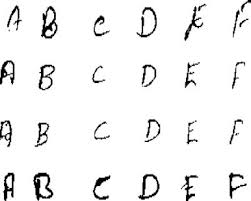

<a id=section101></a> 
### 1.1. Introduction
The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. First train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.


Each row in the data set represents an image of a handwritten alphabet. Using some basic image processing, the images are converted into m X n pixels, where m and n depend on the size and resolution of the original image. Each pixel contains numeric values, with higher values denoting the presence of dense 'ink'. In the pixels where nothing is written, the pixel value is 0.

A pixel is called 'on' if it contains to a positive numeric value, else it is called 'off'.

Since It contains the 26 English alphabets as classes, so it's a multiclass classification problem with 26 classes.Choosen classifier models to recognition the letter. 
     

<a id=section102></a> 
### 1.2. Data source and dataset (INSAID)
 https://github.com/insaid2018/Term-4/blob/master/Projects/LetterRecognition_test.csv
 
 https://github.com/insaid2018/Term-4/blob/master/Projects/LetterRecognition_train.csv

<a id=section2></a> 
### 2. Load the packages and data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
data=pd.read_csv('LetterRecognition_train.csv')

<a id=section3></a> 
### 3. Data Profiling
__Unnderstanding the letter recognition Dataset__

<a id=section301></a> 
### 3.1. dtypes:

In [3]:
# Display the data type for each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
letter    16000 non-null object
x-box     16000 non-null int64
y-box     16000 non-null int64
width     16000 non-null int64
high      16000 non-null int64
onpix     16000 non-null int64
x-bar     16000 non-null int64
y-bar     16000 non-null int64
x2bar     16000 non-null int64
y2bar     16000 non-null int64
xybar     16000 non-null int64
x2ybr     16000 non-null int64
xy2br     16000 non-null int64
x-ege     16000 non-null int64
xegvy     16000 non-null int64
y-ege     16000 non-null int64
yegvx     16000 non-null int64
id        16000 non-null int64
dtypes: int64(17), object(1)
memory usage: 2.2+ MB


<a id=section302></a> 
### 3.2. head :

In [4]:
data.head()


,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


<a id=section4></a> 
### 4. Preprocessing:

In [5]:
data.isnull().sum()


letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
id        0
dtype: int64

In [6]:
data['letter'].value_counts()


M    648
U    646
T    644
Y    641
D    638
P    635
A    633
B    630
V    628
X    628
F    622
N    617
E    616
Q    615
O    614
W    613
G    609
L    604
J    599
R    597
C    594
K    593
I    590
S    587
H    583
Z    576
Name: letter, dtype: int64

<a id=section5></a> 
### 5. Feature Transformation/Engineering

<a id=section501></a>
### 5.1 know the "frequency of each letter"

[]

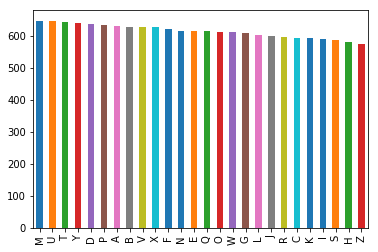

In [7]:
data['letter'].value_counts().plot.bar()
plt.plot()

In the given dataset we have 'letter' as a target variable which has English alphabet and the remaining features are the independent variables which are used to predict the English Alphabet.
Splitting the data into target variable and independent variables by slicing.

In [8]:
X=data.iloc[:,1:-1]
y=data.iloc[:,0]
print(X.head())
print(y.head())

   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      5     12      3     7      2     10      5      5      4     13      3   
1      4     11      6     8      6     10      6      2      6     10      3   
2      7     11      6     6      3      5      9      4      6      4      4   
3      2      1      3     1      1      8      6      6      6      6      5   
4      4     11      5     8      3      8      8      6      9      5      6   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0      9      2      8      4     10  
1      7      3      7      3      9  
2     10      6     10      2      8  
3      9      1      7      5     10  
4      6      0      8      9      7  
0    I
1    D
2    N
3    G
4    S
Name: letter, dtype: object


<a id=section502></a>
### 5.2 Plotting "train dataset" 

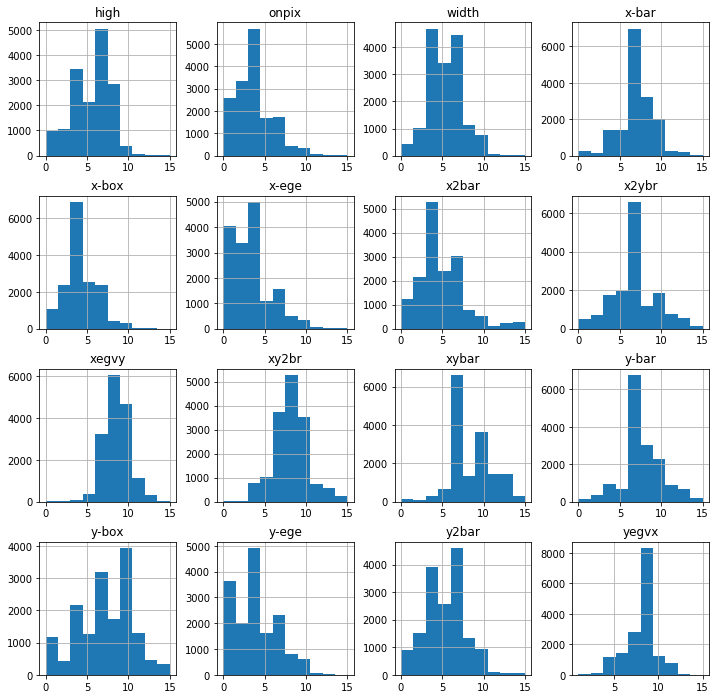

In [9]:
X.hist(figsize=[12,12])
plt.show()

<a id=section503></a>
### 5.3 Scatter and density plots:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002106C54FB38>,
      dtype=object)

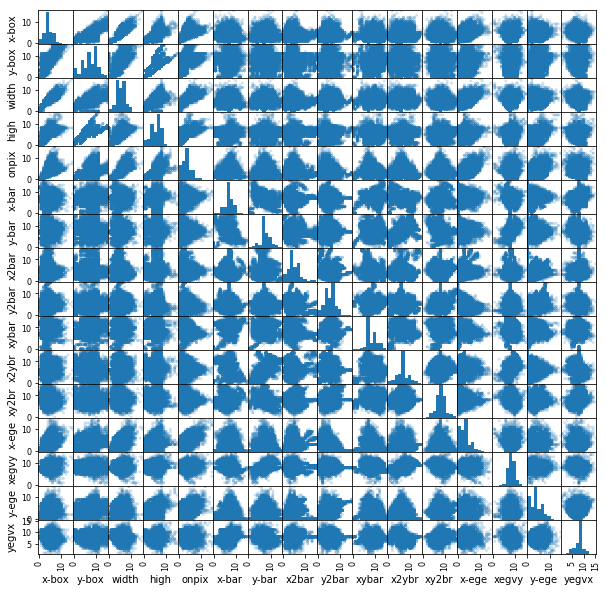

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(X,alpha=0.2,figsize=(10, 10))

In [11]:
X.shape,y.shape

((16000, 16), (16000,))

<a id=section504></a>
### 5.4  Checking if any columns in dataset are correlated


In [12]:
X.corr()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
x-box,1.000000,0.758492,0.849730,0.672411,0.617252,-0.034713,0.044150,0.014182,0.051507,0.144867,0.032826,-0.048263,0.488636,0.093734,0.276255,-0.105839
y-box,0.758492,1.000000,0.669572,0.822711,0.553663,0.038560,-0.040949,-0.021831,0.098287,0.156494,-0.057965,-0.014609,0.272029,-0.005381,0.232734,-0.045708
width,0.849730,0.669572,1.000000,0.657547,0.765499,0.059631,0.023553,-0.098898,0.055865,0.111506,0.010362,-0.048081,0.557153,0.041616,0.260104,-0.118345
high,0.672411,0.822711,0.657547,1.000000,0.641531,0.037395,-0.016932,0.082821,0.057560,0.010374,-0.013191,0.018867,0.264402,0.022542,0.296728,-0.021674
onpix,0.617252,0.553663,0.765499,0.641531,1.000000,0.139748,-0.029614,-0.012015,-0.066245,-0.072638,-0.073817,-0.041010,0.628347,0.016534,0.492013,-0.061209
x-bar,-0.034713,0.038560,0.059631,0.037395,0.139748,1.000000,-0.355938,-0.049540,-0.123988,0.082726,-0.340966,-0.030756,0.146668,-0.257161,0.127385,0.253214
y-bar,0.044150,-0.040949,0.023553,-0.016932,-0.029614,-0.355938,1.000000,-0.121651,-0.048543,0.178189,0.602633,-0.271405,-0.041559,0.555728,-0.078771,-0.208390
x2bar,0.014182,-0.021831,-0.098898,0.082821,-0.012015,-0.049540,-0.121651,1.000000,-0.190073,-0.312994,0.036867,0.077519,0.145096,-0.086742,0.008552,0.185780
y2bar,0.051507,0.098287,0.055865,0.057560,-0.066245,-0.123988,-0.048543,-0.190073,1.000000,0.133950,-0.060569,0.120171,-0.385970,-0.051476,0.278313,-0.062499
xybar,0.144867,0.156494,0.111506,0.010374,-0.072638,0.082726,0.178189,-0.312994,0.133950,1.000000,0.055915,-0.102627,-0.179273,0.027476,-0.084143,-0.114321


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<a id=section6></a>
### 6. Modeling and Predictions

<a id=section601></a> 
### 6.1. Random Forest Classifier:

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=245,criterion='entropy',random_state=0,min_samples_split=2)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=245, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
y_pred=rfc.predict(X_test)

from sklearn.metrics import accuracy_score
ac= accuracy_score(y_test,y_pred)
print('Accuracy is :',ac*100)

Accuracy is : 96.21875


<a id=section602></a> 
### 6.2. KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='brute',n_neighbors =1 ,leaf_size=100,p=30)
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test) 

acc=accuracy_score(y_test,knn_predictions)
print('Accuracy is :',acc*100)

Accuracy is : 94.5625


<a id=section603></a> 
### 6.3. XGBoost

In [17]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=1.0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.97%


<a id=section604></a> 
### 6.4. Support Vector Classifier

In [18]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1E01,tol=0.1)
model.fit(X_train, y_train)
predicted= model.predict(X_test)

C:\Users\sklab\Anaconda2\envs\skl_3.5\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.28%


<a id=section7></a> 
### 7 .Test Predictions

In [20]:
df1=pd.read_csv('LetterRecognition_train.csv')

In [21]:
df1.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


Removing the unnecessary independent variables

In [22]:
X1=df1.iloc[:,1:-1]
print(X1.head())
X1.shape

   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      5     12      3     7      2     10      5      5      4     13      3   
1      4     11      6     8      6     10      6      2      6     10      3   
2      7     11      6     6      3      5      9      4      6      4      4   
3      2      1      3     1      1      8      6      6      6      6      5   
4      4     11      5     8      3      8      8      6      9      5      6   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0      9      2      8      4     10  
1      7      3      7      3      9  
2     10      6     10      2      8  
3      9      1      7      5     10  
4      6      0      8      9      7  


(16000, 16)

### Random_Forest_Classifier :

In [23]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=245, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
y_pred=rfc.predict(X1)
y_pred

array(['I', 'D', 'N', ..., 'E', 'C', 'U'], dtype=object)

In [25]:
submission = pd.DataFrame(y_pred,index=df1.id,columns=['letter'])
submission.to_csv('submissionr.csv')

### Support_Vector_Classifier :

In [26]:
model.fit(X,y)

C:\Users\sklab\Anaconda2\envs\skl_3.5\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.1, verbose=False)

In [27]:
y_pred=model.predict(X1)

In [28]:
submission = pd.DataFrame(y_pred,index=df1.id,columns=['letter'])
submission.to_csv('submissionsvm.csv')

<a id=section8></a>
### Conclussion

From above all, as SVC algorithm gave good accuracy, it is considered and used for predicting test dataset.

Final result is in "submissionsvm.csv" file.
